In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset1 = pd.read_csv(r'net32Top1ReadyForML.csv')
dataset1 = dataset1.set_index('date')

In [22]:
# Removing the first 7 days from the data set
dataset1 = dataset1.iloc[7:,:]

In [23]:
# for i in dataset1.columns:
dataset1.columns

Index(['Profit_3MD-712-036', 'Avg. return on sales_3MD-712-036',
       '7dayRosAverage', '7dayRosAverage*100',
       'Distinct count of order id_3MD-712-036', 'quantity_3MD-712-036',
       '7DaySumOfQTY', 'profitPerQuantitySold_3MD-712-036',
       'profitPerOrderMade_3MD-712-036', 'amazonTop1ItemAvg.weeklyReturn',
       'amazonTop1ItemAvg.weeklyReturn*100', 'Prediction_3MD-712-036'],
      dtype='object')

In [24]:
dataset1.dtypes

Profit_3MD-712-036                          int64
Avg. return on sales_3MD-712-036          float64
7dayRosAverage                            float64
7dayRosAverage*100                        float64
Distinct count of order id_3MD-712-036      int64
quantity_3MD-712-036                        int64
7DaySumOfQTY                              float64
profitPerQuantitySold_3MD-712-036           int64
profitPerOrderMade_3MD-712-036              int64
amazonTop1ItemAvg.weeklyReturn            float64
amazonTop1ItemAvg.weeklyReturn*100        float64
Prediction_3MD-712-036                    float64
dtype: object

In [ ]:
for i in dataset1.columns:
    if i == '7dayRosAverage'   or i == 'Avg. return on sales_3MD-712-036'\
    or i == 'amazonTop1ItemAvg.weeklyReturn' :
        continue
    dataset1[f"{i}"] = dataset1[f"{i}"].astype(np.int64) 

In [27]:
dataset1.dtypes

Profit_3MD-712-036                          int64
Avg. return on sales_3MD-712-036          float64
7dayRosAverage                            float64
7dayRosAverage*100                          int64
Distinct count of order id_3MD-712-036      int64
quantity_3MD-712-036                        int64
7DaySumOfQTY                                int64
profitPerQuantitySold_3MD-712-036           int64
profitPerOrderMade_3MD-712-036              int64
amazonTop1ItemAvg.weeklyReturn            float64
amazonTop1ItemAvg.weeklyReturn*100          int64
Prediction_3MD-712-036                      int64
dtype: object

In [37]:
XX = dataset1.iloc[:,[0,6]].values
yy = dataset1.iloc[:,-1].values

In [38]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size = 0.25, random_state = 0)

In [39]:
# Applying feature scaling for a more accurate predictions for
# which users will buy or not an SUV, targeting users 
from sklearn.preprocessing import StandardScaler
sc_XX = StandardScaler()
XX_train = sc_XX.fit_transform(XX_train)
XX_test = sc_XX.transform(XX_test)

C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(XX_train,yy_train)

C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
# Introducing a new variable: the vector of predictions,
# a vector which gives a prediction for each of the test set observations 
yy_pred = classifier.predict(XX_test)

In [42]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(yy_test, yy_pred) 
cm 

array([[ 4, 18],
       [ 5, 49]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


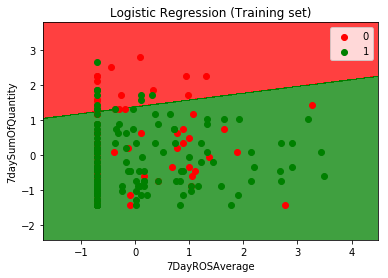

In [44]:
from matplotlib.colors import ListedColormap
XX_set, yy_set = XX_train, yy_train
X1, X2 = np.meshgrid(np.arange(start = XX_set[:, 0].min() - 1, stop = XX_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = XX_set[:, 1].min() - 1, stop = XX_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(yy_set)):
    plt.scatter(XX_set[yy_set == j, 0], XX_set[yy_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('7DayROSAverage')
plt.ylabel('7daySumOfQuantity')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


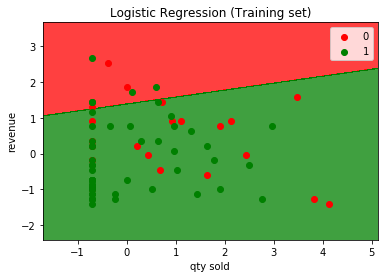

In [45]:
from matplotlib.colors import ListedColormap
XX_set, yy_set = XX_test, yy_test
X1, X2 = np.meshgrid(np.arange(start = XX_set[:, 0].min() - 1, stop = XX_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = XX_set[:, 1].min() - 1, stop = XX_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(yy_set)):
    plt.scatter(XX_set[yy_set == j, 0], XX_set[yy_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Testing set)')
plt.xlabel('7DayROSAverage')
plt.ylabel('7daySumOfQuantity')
plt.legend()
plt.show()

In [10]:
print(yy_pred)
print(yy_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 1]


In [13]:
print(len(XX_set))
print(len(yy_set))
print(len(np.unique(yy_set)))

48
48
2


In [12]:
XX_set[yy_set == j, 0]

array([-0.40143588, -0.37388002, -0.30904272, -0.39657308, -0.40143588,
       -0.25717287, -0.35442883, -0.3528079 ])

In [14]:
yy_set

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1], dtype=int64)